In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import center_of_mass

In [3]:
filename = 'card_on_desk.jpg'

In [4]:
img = cv2.imread(filename, cv2.IMREAD_COLOR)

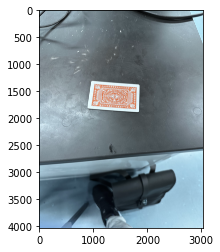

In [5]:
plt.imshow(img)

In [7]:
edges = cv2.Canny(img, 100, 200)

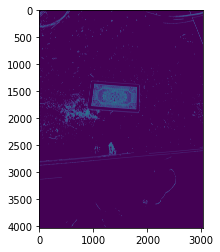

In [8]:
plt.imshow(edges)

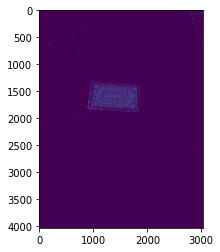

In [26]:
grey_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

threshold_value = 200 
_, mask = cv2.threshold(grey_img, threshold_value, 255, cv2.THRESH_BINARY)

masked_img = np.zeros_like(img)
masked_img[mask == 255] = img[mask == 255]
masked_img[masked_img != 255] = 0

masked_img = cv2.cvtColor(masked_img, cv2.COLOR_RGB2GRAY)

plt.imshow(masked_img)

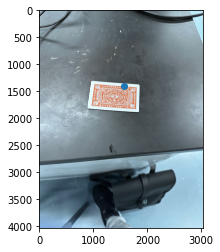

In [39]:
plt.scatter(*center_of_mass(masked_img / 255.0))
plt.imshow(img)

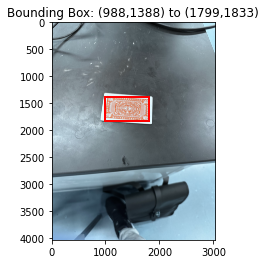

In [40]:
ys, xs = np.where(masked_img / 255 == 1)

min_x, max_x = xs.min(), xs.max()
min_y, max_y = ys.min(), ys.max()

fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')

rect = plt.Rectangle((min_x, min_y), max_x - min_x, max_y - min_y, 
                        edgecolor='red', facecolor='none', linewidth=2)
ax.add_patch(rect)

plt.title(f'Bounding Box: ({min_x},{min_y}) to ({max_x},{max_y})')
plt.show()